In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# !pip install xgboost
import xgboost as xgb

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
data = pd.read_csv("D:/Data science/SolarPrediction.csv")
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [11]:
df = data.copy()

In [12]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [13]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [14]:
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [15]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [16]:
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x: re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int32  
 12  Day                     32686 non-null  int32  
 13  Hour                    32686 non-null  int32  
 14  Minute                  32686 non-null

In [18]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], axis = 1, inplace = True)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [19]:
df.shape

(32686, 15)

In [20]:
df.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
risehour                  0
riseminuter               0
sethour                   0
setminute                 0
dtype: int64

In [21]:
np.array(df['Radiation'])

array([1.21, 1.21, 1.23, ..., 1.2 , 1.23, 1.2 ])

In [22]:
target_feature = df.drop(['Radiation'], axis = 1)
target = df['Radiation']

# Feature Selection using Correlation Matrix

In [23]:
corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


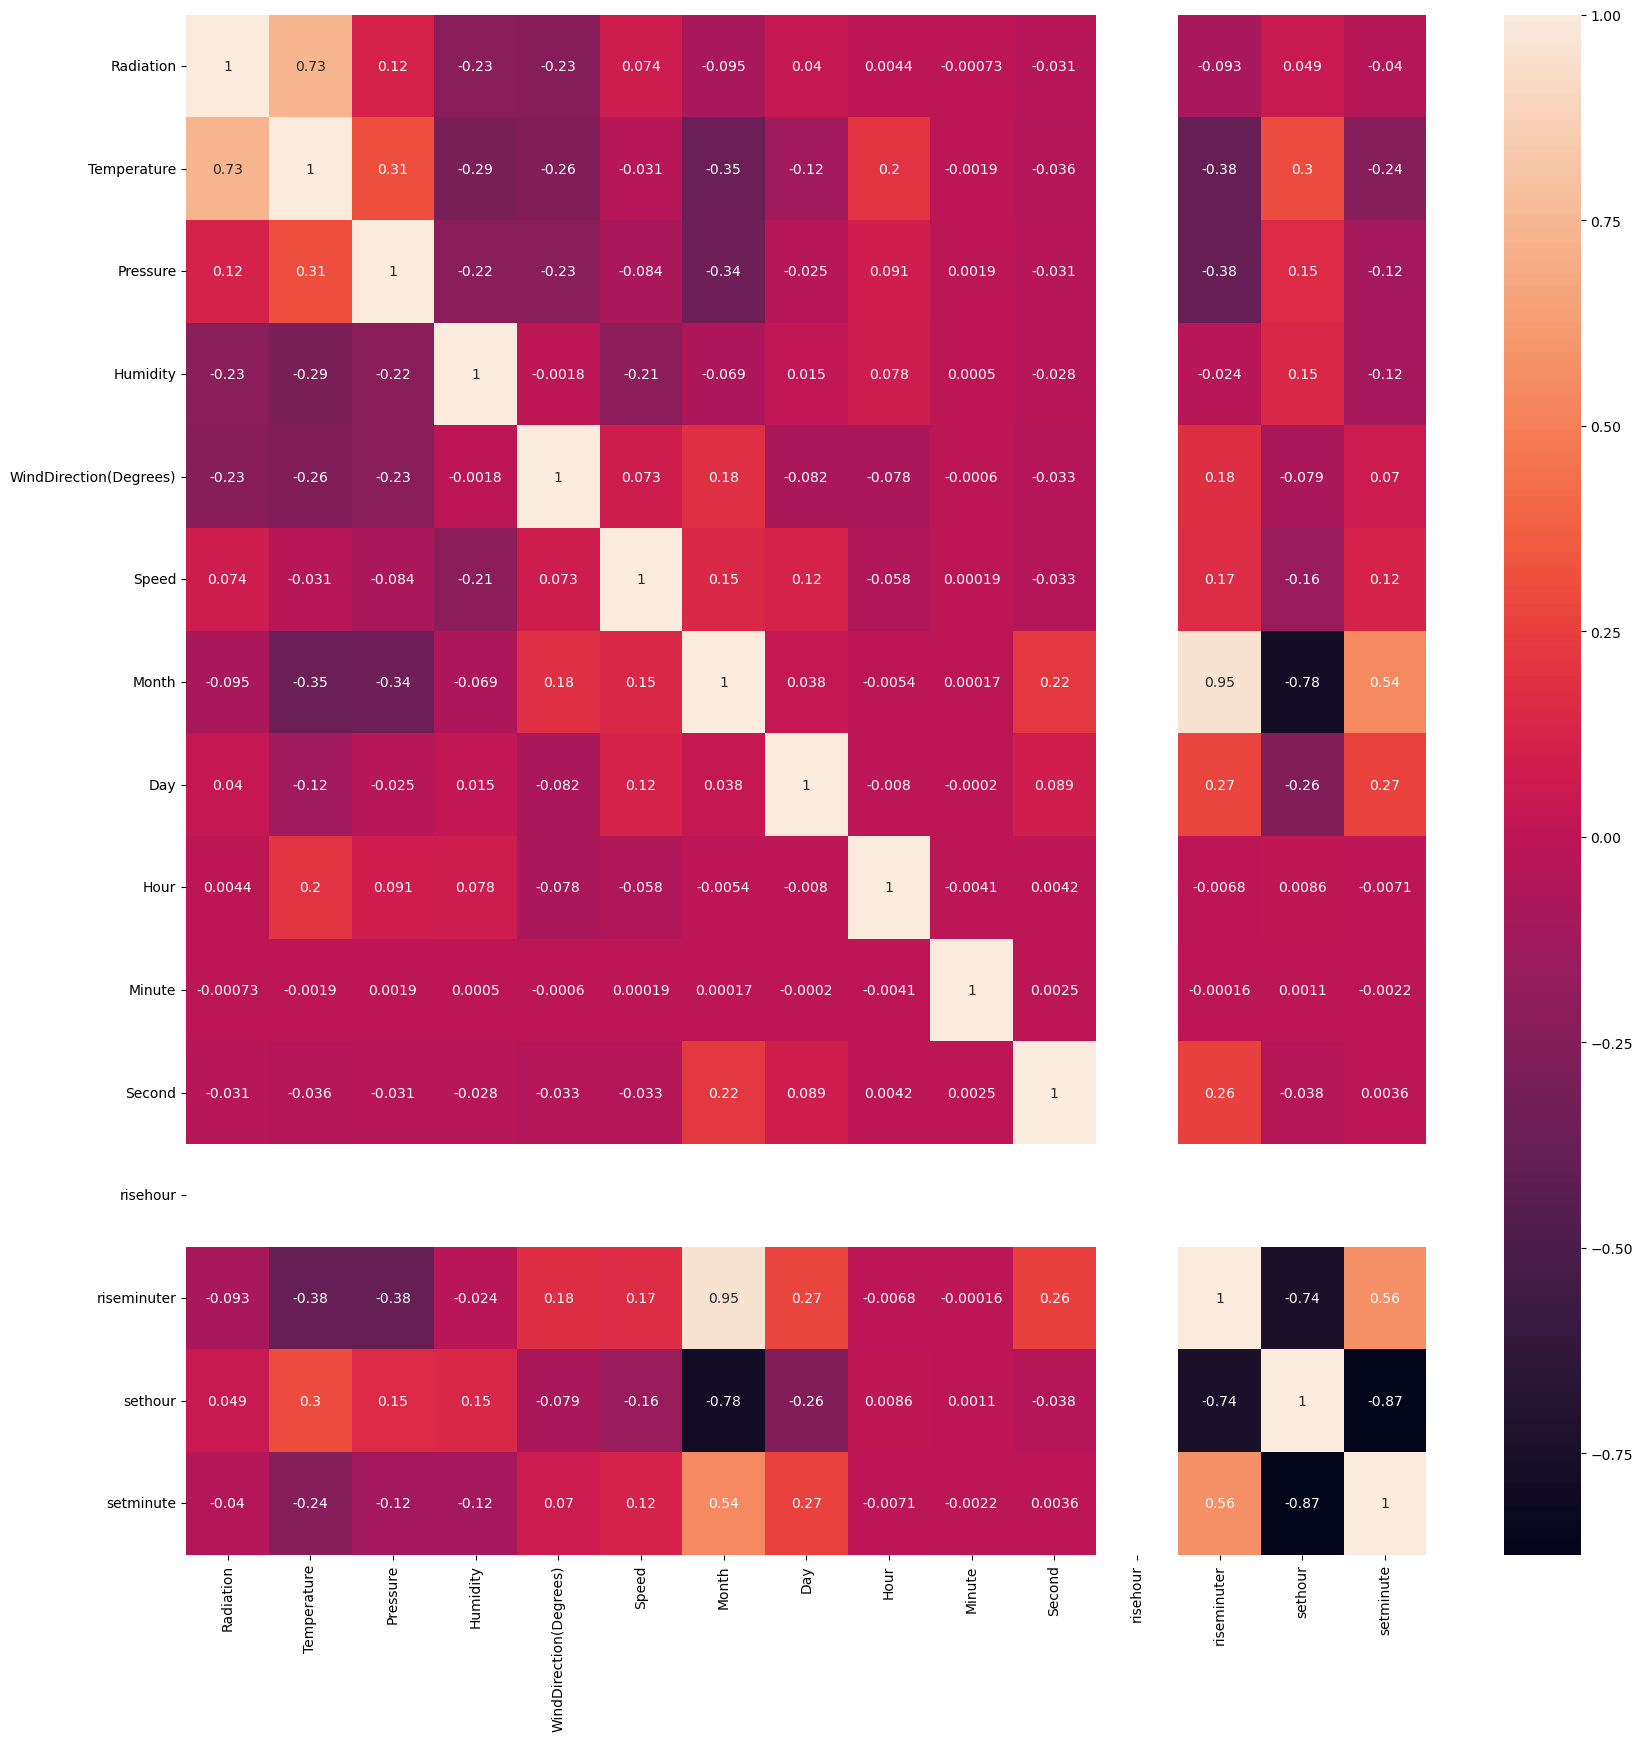

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feature Selection using SelectKBest Method

In [25]:
bestfeature = SelectKBest(score_func=chi2, k=10)

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Y_train = label_encoder.fit_transform(target)

In [27]:
target_count = df['Radiation'].apply(lambda x: int(x*100))
scaled_input_feature = MinMaxScaler().fit_transform(target_feature)
fit = bestfeature.fit(scaled_input_feature, target_count)

In [28]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(target_feature.columns)

In [29]:
feature_scores = pd.concat([column, scores], axis = 1)
feature_scores.columns = ['feature', 'feature_imp']

In [30]:
feature_scores.sort_values(by= 'feature_imp', ascending=True, inplace = True)

In [31]:
feature_scores

,feature,feature_imp
1,Pressure,523.791060
7,Hour,691.185393
4,Speed,765.859779
2,Humidity,1588.087433
0,Temperature,1651.685632
13,setminute,1863.712087
9,Second,2288.673032
8,Minute,2702.449333
6,Day,2841.926850
3,WindDirection(Degrees),3271.827277


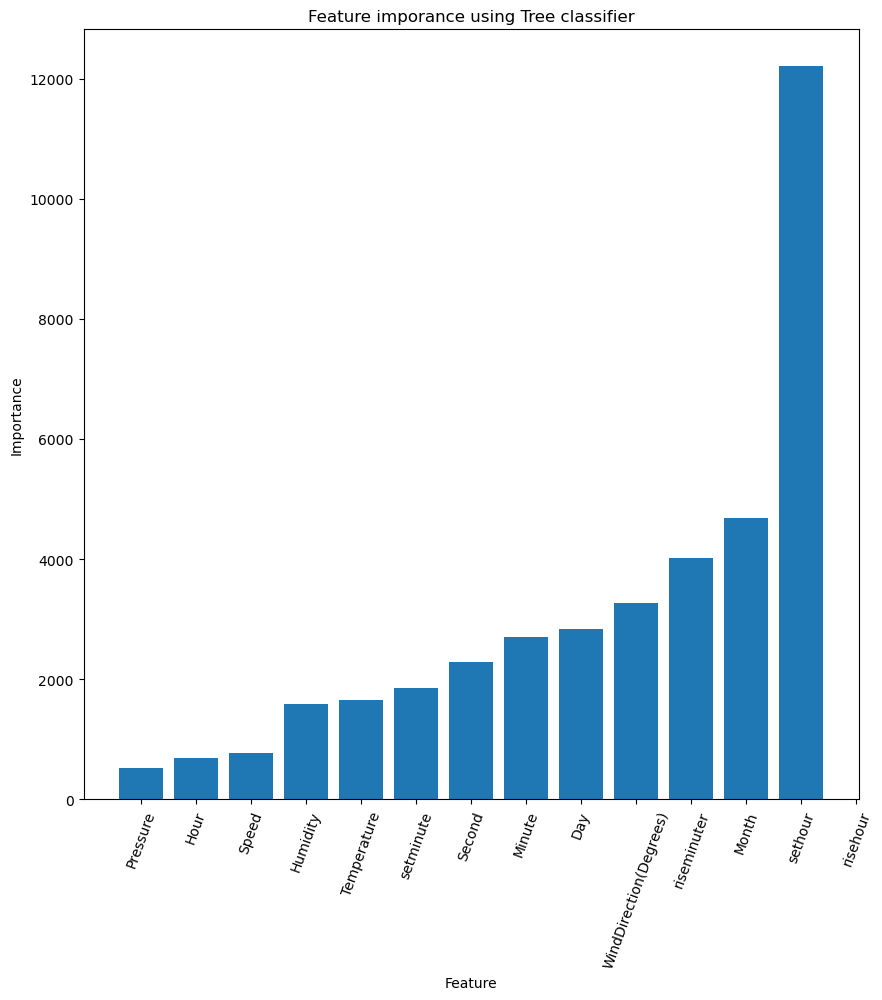

In [32]:
plt.figure(figsize=(10,10))
plt.bar(feature_scores.feature, feature_scores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature imporance using Tree classifier")
plt.show()

# Feature Selection using Extra Tree Classifier

In [ ]:
model = ExtraTreesClassifier(verbose=2, n_estimators = 10)
model.fit(scaled_input_feature, target_count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.6s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10


In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index = target_feature.columns, columns = ["feature_imp"])
feature_importances.sort_values(by = 'feature_imp', ascending=False, inplace = True)
feature_importances

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(feature_importances.index, feature_importances["feature_imp"])
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show()

In [6]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


# Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

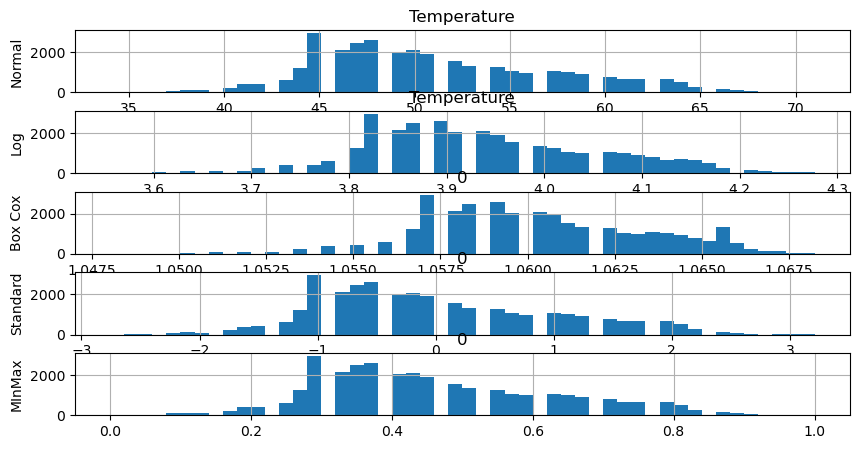

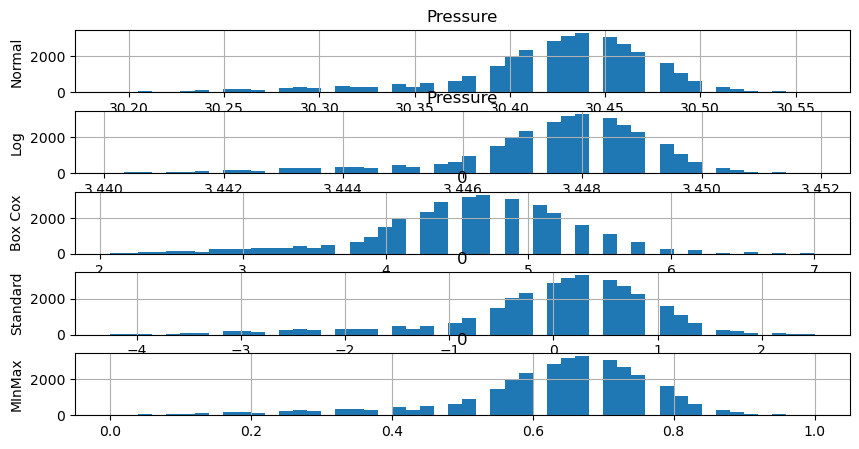

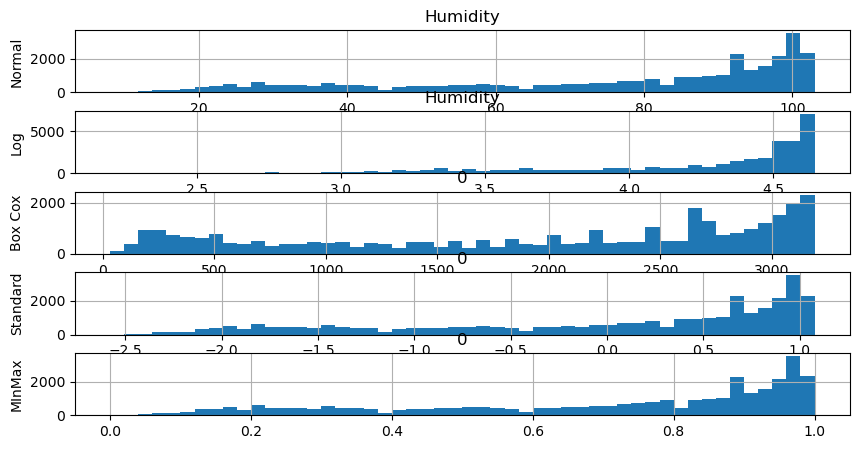

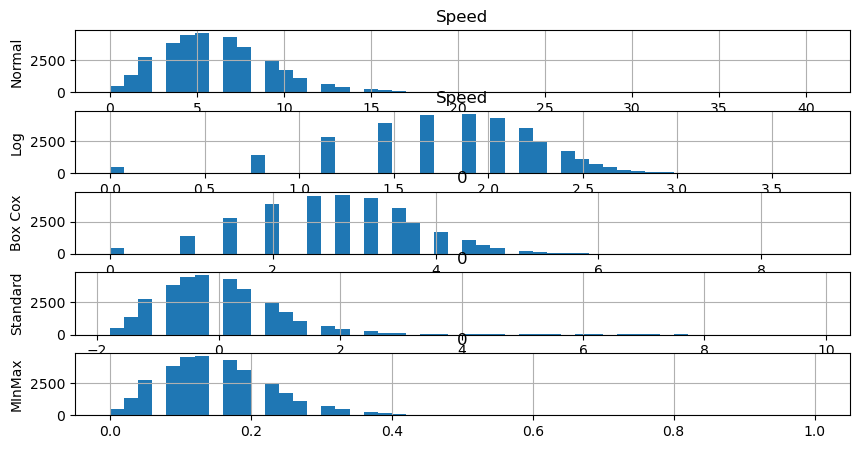

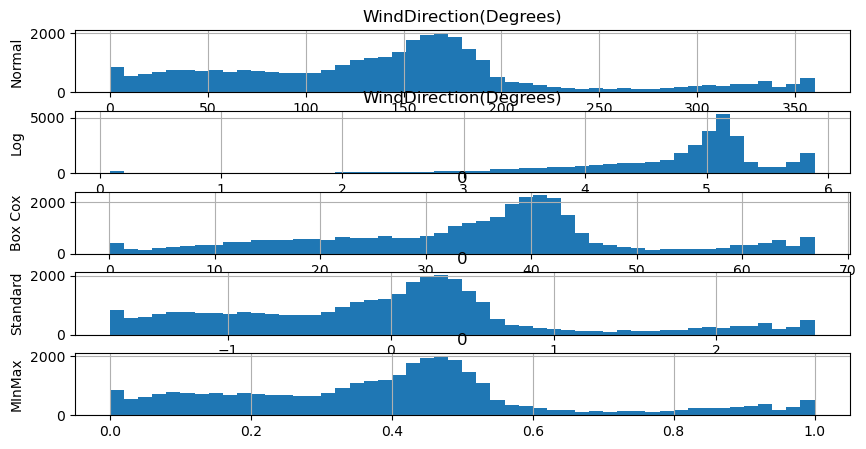

In [35]:
feature_to_transfer = ['Temperature','Pressure', 'Humidity','Speed','WindDirection(Degrees)']

for i in feature_to_transfer:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(10,5))
    
    pd.DataFrame(target_feature[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((target_feature[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(target_feature[i]+1)[0]).hist(ax = ax3, bins = 50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(target_feature[i]).reshape(-1,1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(target_feature[i]).reshape(-1,1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MInMax')

# Preparing data

In [38]:
transform = {'Temperature' : (target_feature['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(target_feature['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(target_feature['Humidity']+1)[0], 
            'Speed' : (target_feature['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(target_feature['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    target_feature[i] = transform[i]

In [39]:
target_feature.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(target_feature, target, test_size=0.3, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [42]:
xtrain.shape, xtest.shape

((22880, 14), (9806, 14))

# Prediction with XGBoost

In [43]:
params = {
    'laerning_rate': 0.1,
    'max_depth' : 8
}

from xgboost import XGBRegressor
model = XGBRegressor(**params)

In [44]:
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, laerning_rate=0.1,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_pred = model.predict(xtest)

In [48]:
print("XGBoost model result is: {0:0.4f}". format(np.sqrt(mean_squared_error(ytest, y_pred))))

XGBoost model result is: 82.8661


In [50]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

r2 = r2_score(ytest, y_pred)

print("Testing Perfomance: ")

print("RMSE result: {:0.2f}".format(rmse))

print("R2 result: {:0.2f}".format(r2))

Testing Perfomance: 
RMSE result: 82.87
R2 result: 0.93


# Using MultiLayer Perceptron for prediction

In [60]:
model = None

model = Sequential()

model.add(Dense(128, activation='relu', input_dim = 14))
model.add(Dropout(0.33))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))

model.compile(metrics = ['mse'], loss = 'mae', optimizer = Adam(learning_rate=0.001))
print(model.summary)

<bound method Model.summary of <Sequential name=sequential_5, built=True>>


In [61]:
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 158.8826 - mse: 91276.0938 - val_loss: 78.6150 - val_mse: 23119.6680
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85.8770 - mse: 27562.4961 - val_loss: 71.9969 - val_mse: 19701.9062
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 80.1765 - mse: 24289.3887 - val_loss: 66.9196 - val_mse: 17221.5625
Epoch 4/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 77.3681 - mse: 22926.7012 - val_loss: 63.7018 - val_mse: 15980.3359
Epoch 5/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.8070 - mse: 21574.7891 - val_loss: 60.4421 - val_mse: 14777.3916
Epoch 6/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71.5080 - mse: 20107.5547 - val_loss: 58.4477 - val_mse: 14076.2568
Epoch 7/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.1520 - mse: 19111.8398 - val_loss: 56.3470 - val_mse: 13235.0469
Epoch 8/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.5378 - mse: 19015.5723 - val_loss: 55.67

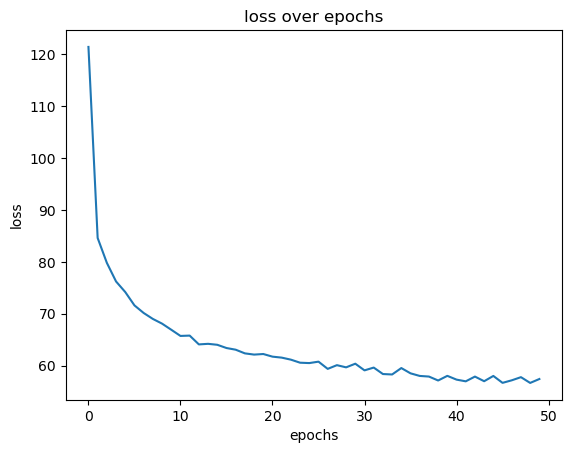

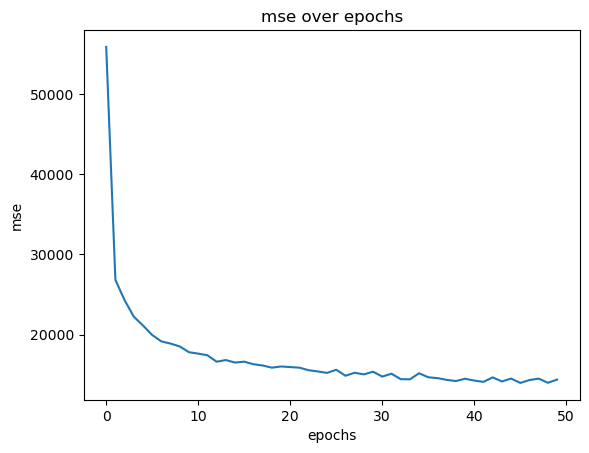

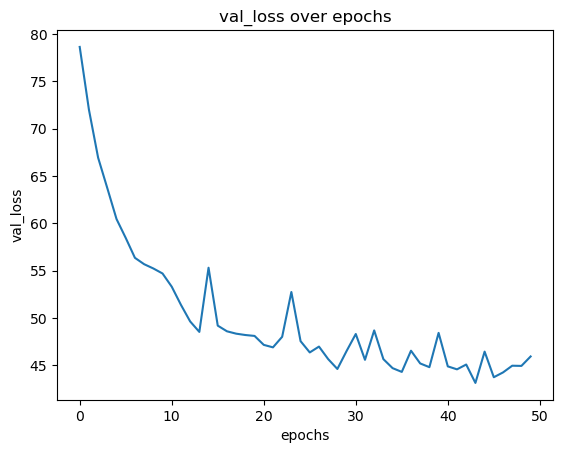

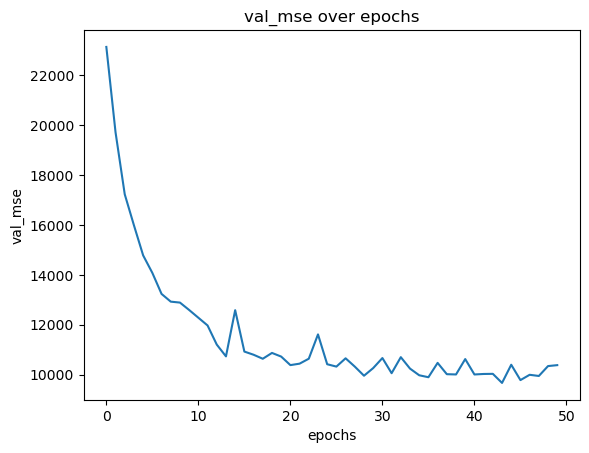

In [62]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [63]:
scores = model.evaluate(xtest, ytest)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ', mae)

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.4183 - mse: 10251.9326
Mean absolute error:  44.696754455566406


In [64]:
mean_absolute_error(ytest, model.predict(xtest))

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


44.69673643324439